# HEART DISEASE PREDICTION

### 1. Importing the Libraries


In [1]:
# Importing essential libraries for data handling and machine learning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 2. Importing the Dataset

In [2]:
# Loading the dataset
data=pd.read_csv('heart.csv')  # Reads the heart disease dataset from a CSV file 

In [3]:
data.head()# Displays the first five rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail()# Displays the last five rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.shape  # 1025 rows , 14 columns # Display the shape (rows and columns) of the dataset

(1025, 14)

In [6]:
data.describe() # Descriptive statistics of the dataset , # Provides statistical insights (mean, std, min, max) for each column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Information about the dataset, including data types and null counts
data.info() , # Displays data type, memory usage, and counts of non-null values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# Count the instances of each target class (1 = has disease, 0 = no disease)
data['target'].value_counts() # 164 with heart disease and 138 with no heart disease

1    526
0    499
Name: target, dtype: int64

In [9]:
# List the column names in the dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
data['age']

0       52
1       53
2       70
3       61
4       62
        ..
1020    59
1021    60
1022    47
1023    50
1024    54
Name: age, Length: 1025, dtype: int64

In [11]:
data['age'].unique()


array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

In [12]:
data['age'].value_counts()

58    68
57    57
54    53
59    46
52    43
56    39
51    39
62    37
60    37
44    36
64    34
41    32
63    32
61    31
67    31
55    30
65    27
53    26
43    26
42    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
38    12
68    12
40    11
71    11
69     9
37     6
34     6
29     4
74     3
76     3
77     3
Name: age, dtype: int64

In [13]:
data['sex'].unique()

array([1, 0], dtype=int64)

In [14]:
data['sex'].value_counts() # MALE(1) 206 , FEMALE(0) 96

1    713
0    312
Name: sex, dtype: int64

In [15]:
data['chol'].unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141], dtype=int64)

In [16]:
data['chol'].value_counts()

234    21
204    21
197    19
212    18
254    17
       ..
257     3
259     3
262     3
290     3
564     3
Name: chol, Length: 152, dtype: int64

### 3. Taking Care of Missing Values

In [17]:
# Check for missing values in the dataset
data.isnull().sum() # no null values ,  # Counts null values in each column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

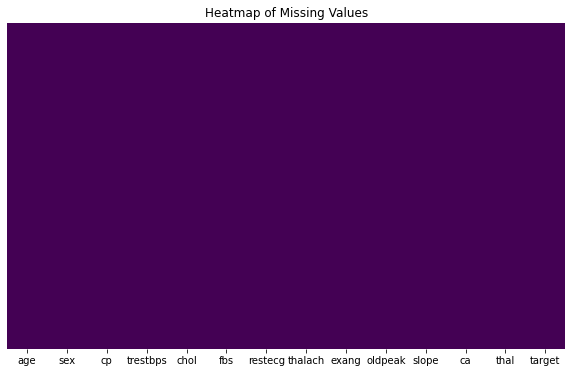

In [19]:
# Check for missing values in heatmap form , # Visualizing missing values with a heatmap (though this data has no nulls)

plt.figure(figsize=(10, 6))  # Set figure size for better readability
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

### 4. Taking Care of Duplicate Values

In [20]:
# Step 1: Check for duplicates initially
data_dup = data.duplicated().any()
print(data_dup)  # This will be True if there are duplicates

True


In [21]:

# Step 2: Drop duplicates
data = data.drop_duplicates()

In [22]:
# Step 3: Recheck for duplicates after dropping them
data_dup = data.duplicated().any()
print(data_dup)  # This should now be False if duplicates were removed


False


### 5. Data Pre Processing

In [23]:
# Separating categorical and continuous columns
cate_val = [] # List to store categorical columns
cont_val = [] # List to store continuous columns

# Classify columns into categorical and continuous
for column in data.columns:
    if data[column].nunique() <= 10:  # Columns with ≤10 unique values are categorical
        cate_val.append(column)
    else:
        cont_val.append(column)


In [24]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [25]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6. Encoding Categorical Data

In [26]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [27]:
data['cp'].unique() # 4 values 0,1,2,3 some ML models understand theres a order but its not the case no case it is just chest pain type so convert into binary vector , cp will have 4 columns


array([0, 1, 2, 3], dtype=int64)

In [28]:
data['exang'].unique()

array([0, 1], dtype=int64)

In [29]:
data['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [30]:
data['fbs'].unique()

array([0, 1], dtype=int64)

In [31]:
data['slope'].unique()

array([2, 0, 1], dtype=int64)

In [32]:
data['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

### MULTICOLLINEARITY

#### The dummy variable trap occurs when one-hot encoding is applied to categorical variables, and all categories are included as binary (0/1) variables, leading to multicollinearity. In other words, one variable becomes perfectly predictable by the others, which can confuse machine learning models like linear regression.

The issue arises because you can perfectly predict the value of one column using the others. For example, if cp_0 = 1, then cp_1 = cp_2 = cp_3 = 0. This introduces multicollinearity, meaning that the model can become confused because of the redundant information.


### How to avoid the dummy variable trap:
To avoid the dummy variable trap, you can drop one of the dummy columns. If you have n categories, you only need n-1 dummy variables. The remaining column will implicitly be represented by the absence of all other dummy variables.

In our case drop sex,target as they already have 0,1 (binary)

### n pandas, you can prevent this by using the drop_first=True parameter in pd.get_dummies():

In [33]:
cate_val.remove('sex')  # sex,target already have 2 values 0,1 so we drop it , # One-hot encoding for categorical variables (except binary columns like 'sex' and 'target')
cate_val.remove('sex')
cate_val.remove('target')

In [34]:
cate_val

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [35]:
data = pd.get_dummies(data,columns = cate_val, drop_first=True) # removes 1st column , # Apply one-hot encoding


In [36]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### 7. Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler # Scaling continuous features for better model performance

In [38]:
data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [39]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [40]:
st = StandardScaler() # Initialize the scaler
data[cont_val] = st.fit_transform(data[cont_val]) # Apply scaling to continuous features

In [41]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### 8. Splitting The Dataset Into The Training Set And Test Set

In [42]:
X = data.drop('target', axis = 1) # all independent variables , # Separating independent (X) and dependent (y) variables

In [43]:
X # All columns except 'target' are independent variables

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [44]:
X.shape

(302, 22)

In [45]:
y = data['target'] # 'target' is the dependent variable

In [46]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [47]:
y.shape

(302,)

In [48]:
# Splitting the dataset into training and test sets (80% training, 20% test)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42) # testing 20% ,training 80%

In [49]:
X_train.shape # 241 = 80% data


(241, 22)

In [50]:
y_train.shape

(241,)

In [51]:
X_test.shape # 61 = 20% data

(61, 22)

In [52]:
y_test.shape

(61,)

### 9. Logistic Regression

In [53]:
data.head() # target has 0,1 so its categorical variable and we need Logistic regression as it is a BINARY CLASSIFICATION TASK

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [54]:
# Logistic Regression model
log = LogisticRegression()  # Initialize logistic regression

In [55]:
log.fit(X_train,y_train) # Train the model on the training data

LogisticRegression()

In [56]:
y_pred1 = log.predict(X_test)  # Predict on the test set

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test , y_pred1) # check doc string by shift + tab , # Calculate accuracy of the logistic regression model


0.7868852459016393

### 10. SVC


In [59]:
from sklearn import svm

In [60]:
# Support Vector Classifier (SVC) model
svm = svm.SVC() # Initialize SVM model

In [61]:
svm.fit(X_train,y_train) # Train SVM model

SVC()

In [62]:
y_pred2 = svm.predict(X_test)# Predict on the test set

In [63]:
accuracy_score(y_test , y_pred2) # check doc string by shift + tab , # Calculate SVM accuracy

0.8032786885245902

### 11. KNeighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
# K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier() # neighbours 5 so to check for which k value we get best accuracy , # Initialize KNN

In [66]:
knn.fit(X_train,y_train)  # Train KNN model

KNeighborsClassifier()

In [67]:
y_pred3 = knn.predict(X_test) # Predict on the test set

In [68]:
accuracy_score(y_test , y_pred3) # check doc string by shift + tab , # Calculate KNN accuracy

0.7377049180327869

In [69]:
# Tuning K value for KNN to find the best accuracy
score = [] # List to store accuracy for different K values
    
for k in range(1,40): # Loop through K values from 1 to 39
        knn = KNeighborsClassifier(n_neighbors = k)   # Initialize KNN with k neighbors
        knn.fit(X_train,y_train) # Train model
        y_pred = knn.predict(X_test) # Predict on test set
        score.append(accuracy_score(y_test , y_pred)) # Store accuracy
         


In [70]:
score  # k value = 2 will give 80% accuracy

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [71]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test , y_pred)

0.8032786885245902

## Non-Linear ML Algorithms


In [72]:
data = pd.read_csv('heart.csv')

In [73]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [74]:
data.shape

(1025, 14)

In [75]:
data = data.drop_duplicates()

In [76]:
data.shape

(302, 14)

In [77]:
X = data.drop('target',axis = 1)
y = data['target']

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42) # testing 20% ,training 80%

### 12. Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt = DecisionTreeClassifier()

In [81]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
y_pred4 = dt.predict(X_test)

In [83]:
accuracy_score(y_test , y_pred4)

0.7213114754098361

### 13. Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier()

In [86]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
y_pred5 = dt.predict(X_test)

In [88]:
accuracy_score(y_test , y_pred5)

0.7213114754098361

### 14. Gradient Boosting Classifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
gbc = GradientBoostingClassifier()

In [91]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [92]:
y_pred6 = dt.predict(X_test)

In [93]:
accuracy_score(y_test , y_pred6)

0.7213114754098361

In [94]:

# Comparing model accuracies in a DataFrame
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming y_test and all the y_pred variables (y_pred1, y_pred2, etc.) already exist

final_data = pd.DataFrame({
    'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],  # Model names
    'ACC': [
        accuracy_score(y_test, y_pred1),  # Logistic Regression accuracy
        accuracy_score(y_test, y_pred2),  # SVM accuracy
        accuracy_score(y_test, y_pred3),  # KNN accuracy
        accuracy_score(y_test, y_pred4),  # Decision Tree accuracy
        accuracy_score(y_test, y_pred5),  # Random Forest accuracy
        accuracy_score(y_test, y_pred6)   # Gradient Boosting accuracy
    ]
})




In [95]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.721311
4,RF,0.721311
5,GB,0.721311


In [96]:
import seaborn as sns

C:\Users\dipes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

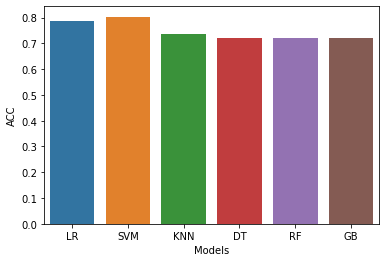

In [97]:
# Plotting model accuracies with a bar plot
sns.barplot(final_data['Models'],final_data['ACC']) # Bar plot of model accuracies

### For production train model on entire dataset

In [98]:
 # Training final model (SVM) on the full dataset for production use
X = data.drop('target',axis = 1)
y = data['target']

In [99]:
X.shape

(302, 13)

In [100]:
from sklearn.svm import SVC

In [101]:
svm = SVC()  # Initialize SVM

In [102]:
svm.fit(X,y) # Train SVM on entire dataset

SVC()

### 15. Prediction on New Data

In [103]:
import pandas as pd

In [104]:
# Creating a new data point with various feature values
new_data = pd.DataFrame({
    'age': [52],
    'sex': [1],
    'cp': [0],
    'trestbps': [125],
    'chol': [212],
    'fbs': [0],
    'restecg': [1],
    'thalach': [168],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [2],
    'ca': [2],
    'thal': [3]
})


In [105]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [124]:
rf.predict(new_data) # Prediction on a new data point , # Predict heart disease for new data with random forest

array([0], dtype=int64)

In [109]:
print(rf.feature_importances_) 

[0.08727831 0.04464056 0.13108523 0.06609614 0.07552544 0.01015831
 0.02591267 0.12703924 0.05028121 0.12463235 0.03941444 0.09448013
 0.12345597]


### 16. Save Model Usign Joblib


In [125]:
import joblib

In [126]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [127]:
model = joblib.load('model_joblib_heart')

In [128]:
model.predict(new_data)

array([0], dtype=int64)

### GUI

In [129]:
# GUI Implementation using Tkinter
import tkinter as tk
from tkinter import Label, Entry, Button
import joblib

In [130]:
# Function to collect inputs and make predictions
def show_entry_fields():
    # Collect inputs from the user
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())

    # Load the trained model
    model = joblib.load('model_joblib_heart')
    
    # Make prediction with the collected inputs
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])

    # Display the result
    if result[0] == 1:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    else:
        Label(master, text="No Heart Disease Detected").grid(row=31)

# GUI setup using Tkinter
master = tk.Tk()
master.title("Heart Disease Prediction System")

# Title Label
Label(master, text="Heart Disease Prediction System", bg="black", fg="white").grid(row=0, columnspan=2)

# Labels and Entry fields for each feature
Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP (Chest Pain)").grid(row=3)
Label(master, text="Enter Value of Trestbps (Resting BP)").grid(row=4)
Label(master, text="Enter Value of Cholesterol").grid(row=5)
Label(master, text="Fasting Blood Sugar [1/0]").grid(row=6)
Label(master, text="Resting ECG").grid(row=7)
Label(master, text="Max Heart Rate Achieved").grid(row=8)
Label(master, text="Exercise Induced Angina [1/0]").grid(row=9)
Label(master, text="Oldpeak").grid(row=10)
Label(master, text="Slope").grid(row=11)
Label(master, text="Number of Major Vessels").grid(row=12)
Label(master, text="Thal (Thalassemia)").grid(row=13)

# Entry fields for user input
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

# Grid positioning for entry fields
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

# Button to trigger prediction
Button(master, text='Predict', command=show_entry_fields).grid(row=30, columnspan=2)

# Start the GUI loop
master.mainloop()

C:\Users\dipes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\dipes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\dipes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\dipes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\dipes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\dipes\anaconda3\lib\site-packages\sklearn\base.py:4